# TP 1: Parcours des protons dans la matière

### Par Mathieu Marquis, Charles-Antoine Parent et Thomas Piuze

<div style="color:red; font-size:18px;">
Total : 36.25/40
</div>


<div style="color:red; font-size:18px;">
Présentation : 1.25/2

<div style="font-size:14px;">
    <li>#7 : Important d'identifier toutes les courbes sur le graphique directement -0.25</li>
    <li>J'aurais aimé voir des références. -0.5</li>

</div>
</div>

In [1]:
import timeit
import numpy as np
import scipy as sp
import pandas as pd
import graphinglib as gl

from typing import Callable
from scipy.constants import N_A, c
from scipy.stats import moyal

## Questions:

### 1- Exprimez la densité électronique $n_e$ d’un milieu en fonction de sa composition atomique et de sa masse volumique $\rho$, et calculer $n_e$ pour l’eau (liquide) et l’os compact (définition de l’ICRU). On s’appuiera sur les données du NIST pour les compositions atomiques de ces matériaux.

<div style="color:red; font-size:18px;">
2/2

</div>

La contribution à la densité électronique d'une molécule pour chaque élément $i$ est donnée par
$$n_e^{(i)}=\rho A^{(i)}\frac{N_e^{(i)}N_A}{M^{(i)}}$$
où
$\rho$ : masse volumique de la molécule,
$A^{(i)}$ : abondance massique de l'élément $i$,
$N_e^{(i)}$ : nombre d'électrons par atome de l'élément $i$,
$N_A$ : nombre d'Avogadro,
$M^{(i)}$ : masse molaire de l'élément $i$.

Ainsi, la densité électronique d'une molécule avec $N$ éléments distincts correspond à
$$n_e=\rho N_A\sum_{i=1}^N\frac{A^{(i)}N_e^{(i)}}{M^{(i)}}$$


La cellule suivante donne les numéros atomiques, la fraction massique et la masse molaire des éléments composant l'eau et l'os compact, de même que la masse volumique de ces deux substances. Elle fait ensuite appel à la fonction `densite_electronique` pour obtenir la densité électronique de l'eau et de l'os compact. La fonction `densite_electronique` reçoit en argument la composition chimique d'une matière et sa masse volumique en g/cm $^3$ et retourne sa densité électronique en électrons par cm $^3$. Les données du NIST ont été utilisées.

In [2]:
def densite_electronique(composition: np.ndarray, rho: float) -> float:
    """
    Retourne la densité électronique en électrons par centimètre cube.

    Paramètres
    ----------
    composition : np.array
        Array où chaque ligne représente le numéro atomique, la composition atomique du milieu
        (en fraction de 1) et la masse molaire de chaque élément composant le milieu.
    rho : float
        Densité du milieu en grammes par mole.

    Retourne
    --------
    float
        Densité électronique en électrons par cm^3.
    """
    assert composition[:,1].sum() == 1, "l'abondance chimique de tous les éléments devrait être sommée à 1."
    return rho * N_A * np.sum(composition[:,1] * composition[:,0] / composition[:,2], axis=0)

# Numéros atomiques, composition atomique et masse molaire
composition_eau = np.array([
    [1, 0.111894, 1.008],
    [8, 0.888106, 15.999]
])
composition_os = np.array([
    [1, 0.063984, 1.008], 
    [6, 0.278000, 12.011], 
    [7, 0.027000, 14.007], 
    [8, 0.410016, 15.999],
    [12, 0.002000, 24.305], 
    [15, 0.070000, 30.974], 
    [16, 0.002000, 32.06], 
    [20, 0.147000, 40.078]
])

# Masses volumiques en g/cm^3
rho_eau = 1.00000
rho_os = 1.85000

# Densités électroniques en électrons/cm^3
n_eau = densite_electronique(composition_eau, rho_eau)
n_os = densite_electronique(composition_os, rho_os)
print("Densité électronique de l'eau :", n_eau)
print("Densité électronique le l'os compact :", n_os)

Densité électronique de l'eau : 3.342810286137214e+23
Densité électronique le l'os compact : 5.9058775990097234e+23


### 2- Tracez les courbes du pouvoir d’arrêt collisionnel massique pour ces milieux en fonction de l’énergie cinétique ($T$). Pour expliciter la dépendance en $T$ de $S_{col}$, utilisez les relations 9 et 10 ci-bas. Pour le graphique, utilisez une échelle logarithmique en abscisse. Vous trouverez les énergies moyennes d’excitation $I$ de ces matériaux sur le site du NIST également.

<div style="color:red; font-size:18px;">
2/2

<div style="font-size:14px;">
    <li>Vous auriez pu titrer vos axes au lieu des symboles. -0.25</li>

</div>

</div>

La cellule suivante définit d'abord quelques constantes importantes, de même que les énergies moyennes d'excitation de l'eau liquide et de l'os compact telles que précisées sur le site du NIST. Elle fait ensuite appel à la fonction `calcul_S_col` pour tracer les courbes du pouvoir d'arrêt collisionnel massique. La fonction `calcul_S_col` reçoit en argument l'énergie cinétique du proton (MeV), la densité électronique du milieu (électrons/cm $^3$), l'énergie moyenne d'excitation du milieu (MeV) et la masse volumique du milieu (g/cm $^3$), et retourne le pouvoir d'arrêt collisionnel massique.

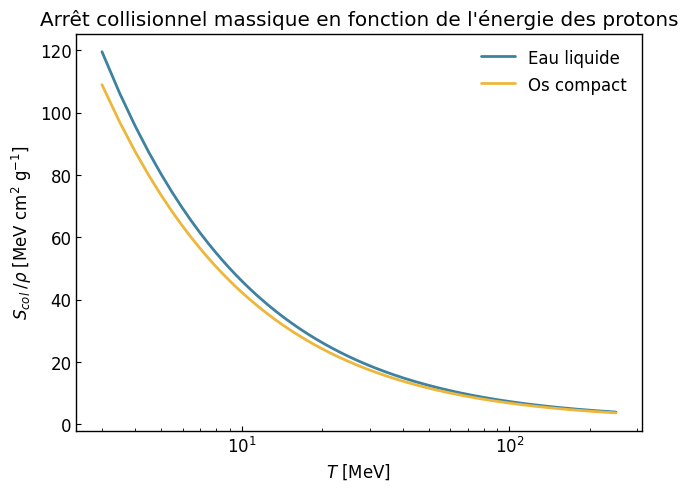

In [3]:
r_e = 10**2*sp.constants.value("classical electron radius") # En cm
m_e = sp.constants.value("electron mass energy equivalent in MeV") / c**2
m_p = sp.constants.value("proton mass energy equivalent in MeV") / c**2
I_eau = 75.000000e-6
I_os = 91.900000e-6

def calcul_S_col(T: float | np.ndarray, n_e: float, I: float, rho: float) -> float | np.ndarray:
    """
    Retourne le pouvoir d'arrêt collisionnel des protons.

    Paramètres
    ----------
    T : float | np.ndarray
        Énergie cinétique en MeV.
    n_e : float
        Densité électronique du matériau en électrons/cm^3.
    I : float
        Énergie moyenne d'excitation du matériau en MeV.
    rho : float
        Masse volumique en g/cm^3.
    
    Retourne
    --------
    float | np.ndarray
        Pouvoir d'arrêt calculé.
    """
    gamma = T / (m_p*c**2) + 1
    beta = np.sqrt((gamma**2 - 1) / gamma**2)
    T_e_max = (2*m_e*c**2 * (gamma**2 - 1)) / (1+(m_e/m_p)**2 + 2*m_e/m_p * gamma)
    S_col = 2*np.pi*r_e**2*m_e*c**2*n_e / beta**2 * (np.log(2*m_e*(c*beta*gamma)**2*T_e_max / I**2) - 2*beta**2)
    return S_col / rho

fig = gl.Figure(
    log_scale_x=True,
    x_label="$T$ [MeV]",
    y_label=r"$S_{col}\:/\rho$ [MeV cm$^2$ g$^{-1}$]",
    title="Arrêt collisionnel massique en fonction de l'énergie des protons"
)
fig.add_elements(gl.Curve.from_function(lambda T: calcul_S_col(T, n_eau, I_eau, rho_eau), 3, 250, label="Eau liquide"))
fig.add_elements(gl.Curve.from_function(lambda T: calcul_S_col(T, n_os, I_os, rho_os), 3, 250, label="Os compact"))
fig.show()


La figure précédente illustre que le pouvoir collisionnel des protons dans l'eau est inférieur à celui dans l'os compact. On remarque également que le pouvoir collisionnel décroit et semble tendre vers l'asymptote $\frac{S_{col}}{\rho}=0$, et que ce comportement est identique pour les deux milieux.

## Portée des protons dans la matière

### L’approximation d’une décélération continue (*Continuous Slowing Down Approximation*, CSDA) des protons dans la matière, en ligne droite, permet d’estimer leur portée dans le milieu considéré (la distance qu’ils peuvent parcourir avant d’avoir transféré au milieu la totalité de leur énergie cinétique initiale). Ici, seuls les transferts d’énergie vers les électrons du milieu sont considérés.

### 3- En quoi la seule considération des interactions des protons avec les électrons du milieu est-elle justifiée ? Appuyez votre réponse en comparant les contributions des interactions nucléaires (protons avec noyaux atomiques du milieu) et radiatives (pertes d’énergie par *Bremsstrahlung*) au pouvoir d’arrêt total sur la plage 3-250 MeV. Les données PSTAR et un graphique pourraient être utiles.

<div style="color:red; font-size:18px;">
1/2

<div style="font-size:14px;">
    <li>Malheureusement, vous avez mélangé des concepts. Sur le site, il n'y a que l'énergie perdue par les collisions avec les électrons et avec les noyaux. Les pertes radiatives sont différentes. Il vous manque donc une explication à ce sujet. -1</li>

</div>
</div>

La cellule suivante permet d'extraire les contributions de chaque interaction pour la plage 3-250 MeV au pouvoir d'arrêt total. Ces contributions sont ensuite présentées sous forme de graphique.

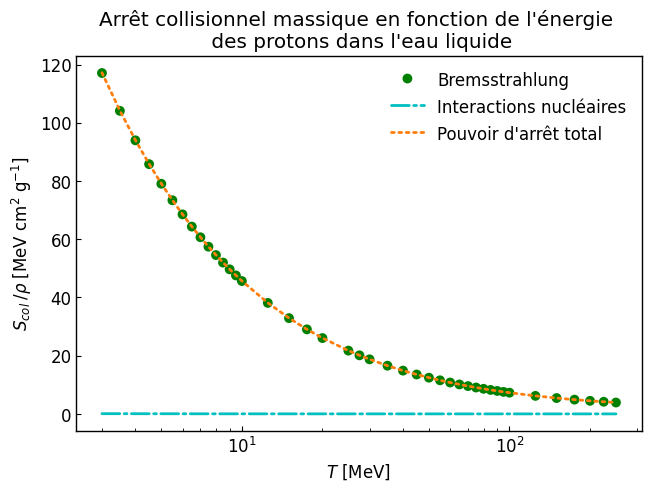

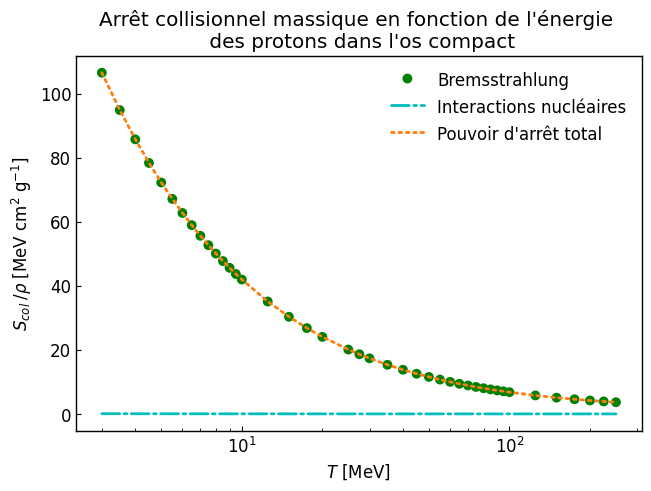

In [4]:
fichier_eau, fichier_os = 'devoirs/tp1/pstar_eau.csv', 'devoirs/tp1/pstar_os.csv'

def portee(fichier, titre):
    donnees = pd.read_csv(fichier, sep=' ', index_col=False)
    energy = np.array(donnees['Kinetic'])
    bremss = np.array(donnees['Electron'])
    nuclear = np.array(donnees['Nuclear'])
    total = np.array(donnees['Total'])
    
    fig = gl.Figure(
        log_scale_x=True,
        x_label="$T$ [MeV]",
        y_label=r"$S_{col}\:/\rho$ [MeV cm$^2$ g$^{-1}$]",
        title=titre
    )
    fig.add_elements(
        gl.Scatter(energy, bremss, face_color='g', label='Bremsstrahlung'),
        gl.Curve(energy, nuclear, color='c', line_style='-.', label='Interactions nucléaires'),
        gl.Curve(energy, total, color='tab:orange', line_style=':', label="Pouvoir d'arrêt total")
    )
    fig.show()
    
portee(fichier_eau, titre="Arrêt collisionnel massique en fonction de l'énergie \n des protons dans l'eau liquide")
portee(fichier_os, titre="Arrêt collisionnel massique en fonction de l'énergie \n des protons dans l'os compact")

Les graphiques précédents, construits à partir des données PSTAR, montrent qu'entre 3 et 250 MeV, la contribution des interactions nucléaires au pouvoir d'arrêt collisionnel est plusieurs ordres de grandeur en dessous de celle du Bremsstrahlung. De ce fait, la contribution du Bremsstrahlung épouse presque parfaitement le pouvoir d'arrêt total. Il est donc possible de négliger les interactions nucléaires pour des protons se situant dans cet intervalle d'énergie et de ne considérer que les interactions radiatives.

La portée par CSDA ($R_{CSDA}$) est obtenue en intégrant l’inverse du pouvoir d’arrêt total par
rapport à l’énergie :

$$R_{CSDA} = \int_0^{T_i}\frac{dT'}{S_{col}},$$

### 4-  Pourquoi intègre-t-on l’inverse du pouvoir d’arrêt pour déterminer la portée ?

<div style="color:red; font-size:18px;">
1/1


</div>
</div>

Le pouvoir d'arrêt collisionnel est défini comme:

$$ S_{col} = -\left(\frac{dT}{dx}\right)_{col} $$

Soit l'opposé de la variation d'énergie cinétique par unité de longueur. Ainsi, la portée peut être déterminée en intégrant l'élément de longueur $dx$ le long du parcours d'un proton :

$$\int_{x(T_i)}^{x(0)}dx = -\int_{x(0)}^{x(T_i)}dx = \int_0^{T_i}\frac{dT'}{-(dT'/dx)_{col}} = \int_0^{T_i}\frac{dT'}{S_{col}} =  R_{CSDA}$$

Ce qui correspond effectivement à la portée de la particule. L'intégration de l'inverse du pouvoir d'arrêt est donc due à la définition de $S_{col}$.

### 5- Justifiez la nécessité d’employer une méthode numérique pour calculer la portée des protons.

<div style="color:red; font-size:18px;">
1/1

</div>

La portée des protons est obtenue en intégrant la fonction inverse du pouvoir d'arrêt collisionnel, soit
\begin{align*}
\frac1{S_{col}}&=\left[\frac{2\pi r_e^2m_ec^2n_e}{\beta^2}\left(\ln\left(\frac{2m_ec^2\beta^2\gamma^2T_e^{max}}{I^2}\right)-2\beta^2\right)\right]^{-1}\\
&=\left[U\left(\frac1{\beta^2}\ln\left(\frac{a\beta^2\gamma^2T_e^{max}}{I^2}\right)-2\right)\right]^{-1}
\end{align*}
Avec les équivalences connues, la dépendance en $T$ de cette expression peut être explicitée telle que
\begin{align*}
\frac1{S_{col}}&=\left[U\left(\frac{1}{1-\gamma^{-2}}\ln\left(\frac{a(\gamma^2-1)\frac{a(\gamma^2-1)}{b+\delta\gamma}}{I^2}\right)-2\right)\right]^{-1}\\
&=\left[U\left(\frac{1}{1-\gamma^{-2}}\ln\left(k\frac{(\gamma^2-1)^2}{b+\delta\gamma}\right)-2\right)\right]^{-1}\\
&=\left[U\left(\frac{1}{1-\left(\frac T{m_pc^2}+1\right)^{-2}}\ln\left(k\frac{\left(\left(\frac T{m_pc^2}+1\right)^2-1\right)^2}{b+\delta\left(\frac T{m_pc^2}+1\right)}\right)-2\right)\right]^{-1}\\
\end{align*}
Pour calculer la portée, il faut intégrer cette expression par rapport à $T$. Selon le principe « Dérive qui veut, intègre qui peut », nous pouvons constater que l'intégration de cette expression analytiquement serait un défi... intéressant. L'intégration numérique est donc essentielle.

### 6- Implémenter deux algorithmes d’intégration numérique pour calculer la portée des protons dans l’eau et dans l’os compact ; le premier avec la méthode des trapèzes et le second avec la méthode de Romberg. Considérez des protons d’énergie initiale de 150 MeV à l’entrée du milieu. Estimez le nombre de tranches requises pour atteindre la précision machine avec chaque méthode, et discutez des conséquences sur le temps de calcul. Notez que comme l’expression 4 n’est valide que pour des protons ayant une énergie supérieure à 3 MeV, cette valeur sera utilisée comme borne d’intégration au lieu de 0. Le biais introduit dans les résultats par cette approximation ne vous sera pas reproché.

<div style="color:red; font-size:18px;">
10/10

</div>
</div>

La cellule suivante définit les fonctions qui seront intégrées par les deux méthodes demandées. Les fonctions `f_eau` et `f_os` ne sont fonction que de l'énergie cinétique $T$ ce qui facilite leur utilisation lors de l'intégration.

In [5]:
def inverse_S_col(T: float | np.ndarray, n_e: float, I: float) -> float | np.ndarray:
    """
    Cette fonction calcule 1/S_col à partir de paramètres déterminés.

    Paramètres
    ----------
    T : float | np.ndarray
        Énergie cinétique en MeV.
    n_e : float
        Densité électronique du matériau en électrons/cm^3.
    I : float
        Masse volumique en g/cm^3.
    
    Retourne
    --------
    float | np.ndarray
        Pouvoir d'arrêt inverse.
    """
    gamma = T / (m_p*c**2) + 1
    beta = np.sqrt((gamma**2 - 1) / gamma**2)
    T_e_max = (2*m_e*c**2 * (gamma**2 - 1)) / (1+(m_e/m_p)**2 + 2*m_e/m_p * gamma)
    S_col = 2*np.pi*r_e**2*m_e*c**2*n_e / beta**2 * (np.log(2*m_e*(c*beta*gamma)**2*T_e_max / I**2) - 2*beta**2)
    return 1 / S_col

f_eau = lambda T: inverse_S_col(T, n_eau, I_eau)
f_os = lambda T: inverse_S_col(T, n_os, I_os)

La fonction `evaluer_avec_trapezes` permet de faire l'évaluation d'une fonction avec un nombre $N$ de trapèzes entre les bornes $a$ et $b$. Cette fonction est appelée à répétition par la fonction `methode_des_trapezes`, qui optimise le nombre de tranches pour obtenir une erreur en-dessous du seuil établi.

In [6]:
def evaluer_avec_trapezes(
        func: Callable,
        a: float,
        b: float,
        N: int,
) -> float:
    """
    Cette fonction calcule une intégrale numérique de la fonction fournie sur l'intervalle [a, b] en utilisant la
    méthode des trapèzes avec N tranches.

    Paramètres
    ----------
    func : Callable
        La fonction à intégrer.
    a : float
        Borne inférieure de l'intervalle d'intégration.
    b : float
        Borne supérieure de l'intervalle d'intégration.
    N : int
        Nombre de tranches.

    Retourne
    --------
    float
        La valeur approchée de l'intégrale.
    """
    h = (b-a) / N
    y = func(np.linspace(a, b, N+1))
    return h * (0.5*(y[0] + y[-1]) + y[1:-1].sum())

def methode_des_trapezes(
        func: Callable,
        a: float,
        b: float,
        n0: int=10,
        erreur_max: float=1e-14,
        n_max: int=np.inf,
        precision_machine: bool=False
) -> tuple[float, float, int]:
    """
    Cette fonction calcule une intégrale numérique de la fonction fournie sur l'intervalle [a, b]
    en utilisant la méthode des trapèzes. Elle s'arrête lorsque l'erreur d'approximation est inférieure
    à la valeur spécifiée par 'erreur_max' ou lorsque le nombre maximum de tranches est atteint.

    Paramètres
    ----------
    func : Callable
        La fonction à intégrer.
    a : float
        Borne inférieure de l'intervalle d'intégration.
    b : float
        Borne supérieure de l'intervalle d'intégration.
    n0 : int
        Nombre initial de tranches. Par défaut, c'est 10.
    erreur_max : float
        Erreur d'approximation maximale tolérée. Par défaut, c'est 1e-14.
    n_max : int 
        Nombre maximum de tranches. Par défaut, il n'y a pas de limite.
    precision_machine : bool
        Spécifie si la précision machine est recherchée. Si oui, l'erreur maximale est remplacée par 1e-16 * la valeur
        de l'intégrale calculée à chaque itération. Par défaut, c'est False.

    Retourne
    --------
    tuple[float, float, int]
        La valeur de l'intégrale approximée, l'erreur d'approximation, et le nombre de tranches utilisées.
    """
    n = n0
    h = (b-a) / n

    I_last = evaluer_avec_trapezes(func, a, b, n)

    erreur = np.inf
    if precision_machine:
        condition = lambda err, I: err > 1e-16 * I
    else:
        condition = lambda err, *args: err > erreur_max
    while condition(erreur, I_last) and n < n_max:
        n *= 2
        h /= 2
        I_new = 0.5 * I_last + h * func(np.linspace(a+h, b-h, n//2)).sum()
        erreur = np.abs(I_new - I_last) / 3
        I_last = I_new

    return I_last, erreur, n

print(methode_des_trapezes(f_eau, 3, 150, precision_machine=True))
print(methode_des_trapezes(f_os, 3, 150, precision_machine=True))

(15.752818650610234, 0.0, 83886080)
(9.159420322790425, 5.921189464667501e-16, 41943040)


La fonction `methode_de_romberg` utilise également la fonction `evaluer_avec_trapezes` pour calculer l'intégrale avec la méthode de Romberg. Notons que la formule utilisée pour l'erreur provient des notes de cours.

In [7]:
def methode_de_romberg(
        func: Callable,
        a: float,
        b: float,
        n0: int=10,
        erreur_max: float=1e-14,
        n_max: int=np.inf,
        precision_machine: bool=False
) -> tuple[float, float, int]:
    """
    Calcule l'intégrale d'une fonction quelconque par la méthode de Romberg.

    Paramètres
    ----------
    func : Callable
        Fonction à intégrer.
    a : float
        Borne d'intégration inférieure.
    b : float
        Borne d'intégration suppérieure.
    n0 : int
        Nombre de tranches utilisées pour la première itération. Par défaut, c'est 10.
    erreur_max : float
        Erreur d'approximation maximale tolérée. Par défaut, c'est 1e-14.
    n_max : int
        Nombre maximum de tranches pour arrêter la récursion.
    precision_machine : bool
        Spécifie si la précision machine est recherchée. Si oui, l'erreur maximale est remplacée par 1e-16 * la valeur
        de l'intégrale calculée à chaque itération. Par défaut, c'est False.

    Retourne
    --------
    tuple[float, float, int]
        La valeur de l'intégrale approximée, l'erreur d'approximation, et le nombre de tranches utilisées.
    """
    n = n0

    R = [[evaluer_avec_trapezes(func, a, b, n)]]
    
    i = 0
    erreur = np.inf
    if precision_machine:
        condition = lambda err, I: err > 1e-16 * I
    else:
        condition = lambda err, *args: err > erreur_max
    while condition(erreur, R[-1][-1]) and n < n_max:
        i += 1
        n *= 2
        R_i = [evaluer_avec_trapezes(func, a, b, n)]

        for m in range(1, i+1):
            R_i.append(1/(4**m - 1) * (4**m * R_i[m-1] - R[i-1][m-1]))

        erreur = 1/(4**m - 1) * np.abs(R_i[-1] - R[-1][-1])
        R.append(R_i)
    return R[-1][-1], erreur, n

print(methode_de_romberg(f_eau, 3, 150, precision_machine=True))
print(methode_de_romberg(f_os, 3, 150, precision_machine=True))

(15.75281865061023, 3.8816806964859284e-17, 1280)
(9.159420322790428, 2.1360086514182344e-17, 1280)


On obtient donc les portées et nombre de tranches suivantes pour atteindre la précision machine :

**Eau**

Trapèzes : 15.752818650610234 cm, 83886080 tranches

Romberg : 15.75281865061023 cm, 1280 tranches


**Os**

Trapèzes : 9.159420322790425 cm, 41943040 tranches

Romberg : 9.159420322790428 cm, 1280 tranches

On remarque que la méthode de Romberg converge pour un nombre de tranches énormément plus faible que la méthode des trapèzes, tout en atteignant la même erreur d'approximation. La méthode de Romberg permet donc un calcul équivalent dans un temps beaucoup plus court, ce qui peut être extrêmement utile pour calculer un grand nombre d'intégrales avec une haute précision.

### 7- Tracez un graphique de la portée calculée par chaque méthode en fonction du nombre d’échantillons (de tranches) considéré. Le même graphique rapportera l’estimation pratique de l’erreur d’approximation pour les deux méthodes (avec une échelle différente en ordonnée). Votre graphique comprendra des points choisis de façon à bien représenter le comportement de vos algorithmes (des échelles logarithmiques pourraient être nécessaires). Doubler le nombre de tranches entre chaque évaluation pourrait s’avérer judicieux.

<div style="color:red; font-size:18px;">
1/1

</div>


Le code suivant utilise les fonctions `methode_des_trapezes` et `methode_de_romberg` pour calculer les portées et les erreurs associées en fonction du nombre de tranches considéré. Le nombre de tranches est doublé entre chaque évaluation. La figure produite présente une échelle verticale standard pour la portée (à gauche) et une échelle verticale logarithmique pour l'erreur d'approximation (à droite). L'échelle horizontale représentant le nombre de tranches est elle aussi logarithmique. Les courbes en pointillé représentent l'erreur d'approximation, tandis que les courbes en trait plein représentent la portée calculée.

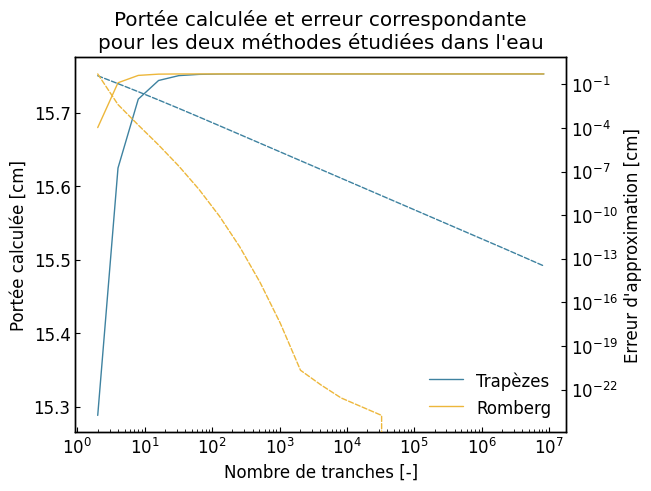

In [8]:
fig = gl.Figure(
    x_label="Nombre de tranches [-]",
    y_label="Portée calculée [cm]",
    log_scale_x=True,
    title="Portée calculée et erreur correspondante\npour les deux méthodes étudiées dans l'eau"
)
axe_erreur = fig.create_twin_axis(is_y=True, label="Erreur d'approximation [cm]", log_scale=True)
valeurs_max_n = np.logspace(0, 23, 24, base=2)[1:]
donnees_trapezes = np.array(
    [[n_max, *methode_des_trapezes(f_eau, 3, 150, n0=1, n_max=n_max, erreur_max=0)[:2]] for n_max in valeurs_max_n]
)
donnees_romberg = np.array(
    [[n_max, *methode_de_romberg(f_eau, 3, 150, n0=1, n_max=n_max, erreur_max=0)[:2]] for n_max in valeurs_max_n]
)

fig.add_elements(
    gl.Curve(donnees_trapezes[:,0], donnees_trapezes[:,1], label="Trapèzes", line_width=1),
    gl.Curve(donnees_romberg[:,0], donnees_romberg[:,1], label="Romberg", line_width=1),
)
axe_erreur.add_elements(
    gl.Curve(donnees_trapezes[:,0], donnees_trapezes[:,2], line_style="--", line_width=1),
    gl.Curve(donnees_romberg[:,0], donnees_romberg[:,2], line_style="--", line_width=1),
)
fig.show()

On remarque que l'erreur (en pointillée) de la méthode de Romberg converge bien plus rapidement vers des faibles valeurs, et l'erreur devient très près de l'erreur machine. Cependant, un peu après 30 000 tranches, la différence entre deux termes est tellement minime qu'elle ne peut plus être représentée par la machine, de telle sorte que l'erreur affichée est nulle. En réalité, il y a encore une erreur, mais celle-ci est bien inférieure à $10^{-22}$ cm. Par ailleurs, nous remarquons également que l'erreur évaluée pour la méthode des trapèzes diminue linéairement avec le nombre de tranches lorsque les échelles sont logarithmiques. L'erreur diminue donc bien plus lentement que celle de la méthode de Romberg.

## Estimation analytique de l'erreur

### Pour la méthode des trapèzes, obtenez la valeur de l’erreur sur la portée calculée à l’ordre le plus grand. À cette fin, il faut connaître la dérivée première de la fonction à intégrer (qui est l’inverse du pouvoir d’arrêt).

### 8- Établir l’expression analytique de la dérivée du pouvoir d’arrêt en fonction de $T$. Cette première étape vous permettra de calculer la dérivée de l’inverse du pouvoir d’arrêt plus facilement ensuite. Pour vous aider, vous pouvez exprimer le pouvoir d’arrêt en fonction de $\gamma$ et utiliser le théorème de dérivation des fonctions composées. Utilisez aussi les définitions suivantes pour simplifier la notation :

<div style="color:red; font-size:18px;">
2/2

</div>

$$
\begin{align*}
T_e^{max} = \frac{a(\gamma^2-1)}{b+\delta\gamma}, \quad \text{avec} \quad a = 2m_ec^2, \quad b = 1+(\frac{m_e}{m_p})^2 \quad \text{et} \quad \delta = 2\frac{m_e}{m_p}
\end{align*}
$$

### et

$$
\begin{align*}
U &= 2\pi r_e^2m_ec^2n_e \\
k &= \frac{a^2}{I^2}
\end{align*}
$$

### sachant aussi que

$$
\begin{align*}
T = (\gamma-1)m_pc^2 \rightarrow \gamma = \frac{T}{m_pc^2}+1 \\
\gamma = \frac{1}{\sqrt{1-\beta^2}} \rightarrow \gamma^2\beta^2 = \gamma^2-1
\end{align*}
$$

La dérivée du pouvoir d'arrêt par rapport à $T$ se calcule comme suit: 

$$ \frac{dS_{col}}{dT} = \frac{dS_{col}}{d\gamma}\frac{d\gamma}{dT} $$

Exprimons d'abord $S_{col}$ en fonction de $\gamma$ uniquement:

$$ 
\begin{align*}
    S_{col} &= 2\pi r_e^2m_ec^2n_e\frac{1}{\beta^2}\left[\ln\left(\frac{2m_ec^2\beta^2\gamma^2T_e^{max}}{I^2}\right)-2\beta^2\right] \\ 
    &= \frac{U}{\beta^2}\left[\ln\left(\frac{a\beta^2\gamma^2\cdot(\gamma^2-1)}{I^2(b+\delta\gamma)}\right)-2\beta^2\right] \\ 
    &= \frac{U\gamma^2}{\gamma^2-1}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)-2U
\end{align*}
$$

On dérive ensuite $S_{col}$ par rapport à $\gamma$:

$$ 
\begin{align*}
    \frac{dS_{col}}{d\gamma} &= \left[\frac{2U\gamma}{\gamma^2-1}-\frac{2U\gamma^3}{(\gamma^2-1)^2}\right]\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\left[\frac{b+\delta\gamma}{k(\gamma^2-1)^2}\left(\frac{4k\gamma(\gamma^2-1)}{b+\delta\gamma}-\frac{k\delta(\gamma^2-1)^2}{(b+\delta\gamma)^2}\right)\right] \\
    &= -\frac{2U\gamma}{(\gamma^2-1)^2}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{(\gamma^2-1)^2}\left[4\gamma-\frac{\delta(\gamma^2-1)}{b+\delta\gamma}\right] \\
    &= \frac{U\gamma}{(\gamma^2-1)^2}\left[4\gamma^2-\frac{\delta\gamma(\gamma^2-1)}{b+\delta\gamma}-2\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)\right] 
\end{align*}
$$

Pour $\frac{d\gamma}{dT}$, nous avons:

$$ \gamma = \frac{T}{m_pc^2}+1 \longrightarrow \frac{d\gamma}{dT} = \frac{1}{m_pc^2} $$

Donc:

$$ 
\begin{align*}
    \frac{dS_{col}}{dT} &= \frac{dS_{col}}{d\gamma}\frac{d\gamma}{dT} \\
    &= \frac{U\gamma}{m_pc^2(\gamma^2-1)^2}\left[4\gamma^2-\frac{\delta\gamma(\gamma^2-1)}{b+\delta\gamma}-2\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)\right] \\
    \text{où} \quad \gamma &= \gamma(T) = \frac{T}{m_pc^2}+1 
\end{align*}
$$

### 9- Rapportez vos portées calculées dans un tableau, qui comprendra aussi les erreurs d’approximation calculées (pour la méthode des trapèzes) et évaluées de façon pratique (pour la méthode des trapèzes et de Romberg). Il s’agit essentiellement des résultats déjà obtenus (auxquels on ajoute les erreurs calculées pour la méthode des trapèzes). Commentez vos résultats.


<div style="color:red; font-size:18px;">
2/2

</div>
</div>

Si on néglige les termes en $\mathcal{O}(h^4)$ et plus, l'erreur d'approximation $\epsilon$ de la méthode des trapèzes est

$$ \epsilon = \frac{1}{12}h^2[f'(a)-f'(b)] $$

et puisque la fonction à intégrer est $f(T) = \frac{1}{S_{col}(T)}$, $f'(T)$ devient :

$$ f'(T) = \frac{-1}{S_{col}^2(T)}\frac{dS_{col}}{dT} $$

La cellule suivante comporte la fonction `derivee` permettant de calculer la dérivée du pouvoir d'arrêt collisionnel par rapport à $T$. La fonction `erreur_trapezes` se sert ensuite de cette dérivée pour calculer l'erreur d'approximation.

In [9]:
def derivee(T: float, n_e: float, I: float) -> float:
    """
    Cette fonction calcule l'expression de la dérivée trouvée précédemment.

    Paramètres
    ----------
    T : float | np.ndarray
        Énergie cinétique en MeV.
    n_e : float
        Densité électronique du matériau en électrons/cm^3.
    I : float
        Masse volumique en g/cm^3.
    
    Retourne
    --------
    float
        Valeur de la dérivée.
    """
    # Calcul des variables et constantes
    gamma = T / (m_p * c**2) + 1
    a = 2 * m_e * c**2
    b = 1 + (m_e / m_p)**2
    delta = 2 * m_e / m_p
    U = np.pi * r_e**2 * a * n_e
    k = a**2/I**2
    # 4 facteurs/termes pour la dérivée
    d1 = U * gamma / (m_p * c**2 * (gamma**2 - 1)**2)
    d2 = 4 * gamma**2
    d3 = delta * gamma * (gamma**2 - 1) / (b + delta * gamma)
    d4 = 2 * np.log(k * (gamma**2 - 1)**2 / (b + delta * gamma))
    return d1 * (d2 - d3 - d4)

def erreur_trapezes(a: float, b: float, N: int, func: Callable, n_e: float, I: float) -> float:
    """
    Cette fonction calcule l'erreur d'approximation avec l'expression de la dérivée.

    Paramètres
    ----------
    a : float
        Borne d'intégration inférieure.
    b : float
        Borne d'intégration suppérieure.
    N : int
        Nombre de tranches utilisées.
    func : Callable
        Fonction à intégrer.
    n_e : float
        Densité électronique du matériau en électrons/cm^3.
    I : float
        Masse volumique en g/cm^3.

    Retourne
    --------
    float :
        L'erreur d'approximation calculée.
    """
    h = (b - a) / N
    f_prime_a = - func(a)**2 * derivee(a, n_e, I)
    f_prime_b = - func(b)**2 * derivee(b, n_e, I)
    return h**2 / 12 * (f_prime_a - f_prime_b)

print(erreur_trapezes(3, 150, 20971520, f_eau, n_eau, I_eau))
print(erreur_trapezes(3, 150, 20971520, f_os, n_os, I_os))

5.347365288488503e-15
3.150673278877834e-15


In [10]:
print(f"trapezes eau : {methode_des_trapezes(f_eau, 3, 150, erreur_max=1e-14)}")
print(f"trapezes os : {methode_des_trapezes(f_os, 3, 150, erreur_max=1e-14)}")
print(f"romberg eau : {methode_de_romberg(f_eau, 3, 150, erreur_max=1e-14)}")
print(f"romberg os : {methode_de_romberg(f_os, 3, 150, erreur_max=1e-14)}")

trapezes eau : (15.752818650610243, 8.881784197001252e-15, 20971520)
trapezes os : (9.159420322790426, 2.960594732333751e-15, 20971520)
romberg eau : (15.75281865061023, 3.8816806964859284e-17, 1280)
romberg os : (9.159420322790428, 2.1360086514182344e-17, 1280)


Avec une erreur maximale de $10^{-14}$ pour faciliter le temps de calcul et pouvoir comparer avec des erreurs évaluées non nulles, les portées calculées et erreurs sont données au Tableau 1.

$$
\begin{aligned}
    & \text {Tableau 1. Portées calculées et erreurs d'approximation calculées et évaluées correspondantes}\\
    &\begin{array}{cccccc}
        \hline
        \text{Milieu} & \text{Portée calculée} & \text{Portée calculée} & \text{Erreur calculée} & \text{Erreur évaluée} & \text{Erreur évaluée} \\
        & \text{par trapèzes} & \text{par Romberg} & \text{pour trapèzes} & \text{pour trapèzes} & \text{pour Romberg} \\
        \text{-} & \text{cm} & \text{cm} & 10^{-15}\ \text{cm} & 10^{-15}\ \text{cm} & 10^{-17}\ \text{cm} \\
        \hline
        \text{Eau} & 15.752818650610243 & 15.75281865061023 & 5.347 & 8.882 & 3.882 \\
        \text{Os} & 9.159420322790426 & 9.159420322790428 & 3.151 & 2.961 & 2.136 \\
        \hline
    \end{array}
\end{aligned}
$$

On remarque que les portées calculées sont égales jusqu'aux deux dernières décimales, illustrant le fait que les intégrales des deux méthodes convergent vers la même valeur. On voit aussi que l'ordre de grandeur des erreurs calculées est comparable à celui des erreurs évaluées pour la méthode des trapèzes. Toutefois, l'erreur évaluée pour la méthode de Romberg est deux ordres de grandeur inférieure, illustrant une nouvelle fois la convergence rapide de cette méthode.

## Optimisation

### Supposons maintenant que l’on cherche à réduire au maximum le temps de calcul, disons pour évaluer en temps quasi-réel la portée de chaque proton individuel émanant de l’accélérateur et dont on connaîtrait précisément l’énergie. Ces protons ont une distribution en énergie pouvant être approximée par une distribution de Moyal, que vous pourrez générer avec `scipy.stats.moyal` avec les paramètres `loc=150, scale=4` (unités en MeV).

### 10- . Utilisez ``moyal.rvs`` pour générer aléatoirement 10 000 énergies tirées de cette distribution et tracez-la (sous forme d’histogramme).

<div style="color:red; font-size:18px;">
1/1

<div style="font-size:14px;">
    <li>Lorsque l'on trace une distribution qui a une expression analytique, il peut être bien de la tracer par dessus.</li>

</div>
</div>

Le code suivant utilise ``moyal.rvs`` pour générer la distribution recherchée, qui est ensuite représentée sous forme d'histogramme divisé en 40 classes.

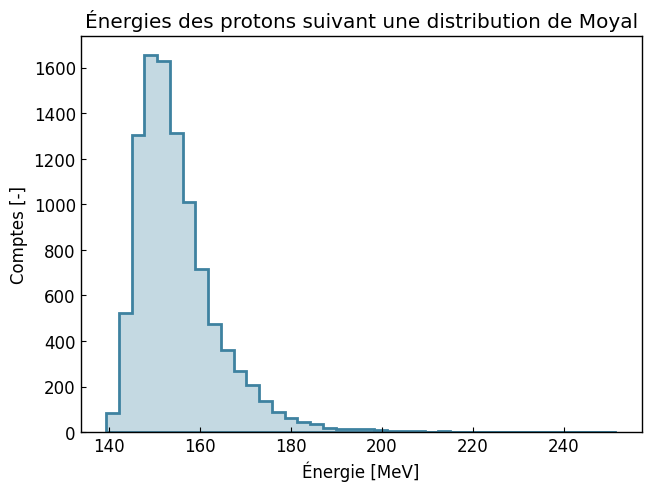

In [11]:
energy = moyal(loc=150, scale=4)
distribution = energy.rvs(size=10000)

fig = gl.Figure('Énergie [MeV]', 'Comptes [-]', title="Énergies des protons suivant une distribution de Moyal")
fig.add_elements(gl.Histogram(distribution, number_of_bins=40, normalize=False))
fig.show(legend=False)

### 11- À l’aide du module ``timeit``, estimez le nombre de protons que vous pouvez calculer par seconde selon trois méthodes : vos implémentations des méthodes par trapèzes et Romberg ainsi que la fonction ``scipy.integrate.quad``. Utilisez les 10 000 valeurs d’énergie générées plus haut pour faire vos tests. Afin de comparer des pommes avec des pommes, vos calculs doivent tous atteindre la précision par défaut de la routine ``scipy.integrate.quad``.

<div style="color:red; font-size:18px;">
1.5/2

<div style="font-size:14px;">
    <li>Savez-vous si l'algo converge en raison de l'erreur relative ou absolue? -0.5</li>

</div>
</div>

Les cellules suivantes se servent du module ``timeit`` et de la précision par défaut de $1.49\times10^{-8}$ de la routine ``scipy.integrate.quad`` pour déterminer le nombre de protons par seconde pouvant être calculé par chaque méthode dans l'os compact.

In [12]:
erreur_scipy = 1.49e-8
test = "for proton in distribution: sp.integrate.quad(f_os, 3, proton)"

time = timeit.timeit(test, globals=globals(), number=1)
print('scipy.integrate.quad :', len(distribution)/time, 'protons/s')

scipy.integrate.quad : 4725.296092971384 protons/s


In [13]:
test = "for proton in distribution: methode_de_romberg(f_os, 3, proton, erreur_max=erreur_scipy)"

time = timeit.timeit(test, globals=globals(), number=1)
print('Méthode de Romberg :', len(distribution)/time, 'protons/s') 

Méthode de Romberg : 8600.716159933958 protons/s


In [14]:
test = "for proton in distribution: methode_des_trapezes(f_os, 3, proton, erreur_max=erreur_scipy)"

time = timeit.timeit(test, globals=globals(), number=1)
print('Méthode des trapèzes :', len(distribution)/time, 'protons/s')

Méthode des trapèzes : 2422.1277599254618 protons/s


Nous constatons que l'implémentation de la méthode de Romberg est plus efficace que la routine ``scipy.integrate.quad`` pour la précision recherchée. L'implémentation de la méthode des trapèzes est cependant moins efficace, ce à quoi nous pouvions nous attendre en raison du grand nombre de tranches nécessaires. La méthode de Romberg permet de calculer plus de deux fois le nombre de protons par seconde calculé par la méthode des trapèzes. L'ordre de grandeur des trois méthodes est cependant relativement similaire. Il est intéressant de préciser qu'une première version des méthodes implémentées n'utilisait pas la pleine puissance du module ``numpy``, se servant plutôt de boucles pour effectuer les sommations. La rapidité de ces implémentations était plusieurs ordres de grandeur en dessous de celle de la routine ``scipy.integrate.quad``. L'utilisation du module ``numpy``, qui fait appel à des langages plus performants que le ``python``, permet de grandement accélérer le processus.

### 12- Faites aussi un histogramme des portées obtenues pour ces 10 000 protons et commentez la distribution obtenue (peut-être en faisant référence au théorème central limite ?)

<div style="color:red; font-size:18px;">
1/2

<div style="font-size:14px;">
    <li>Vous auriez pu calculer la moyenne et l'écart-type. Êtes-vous certain.es que c'est ce que signifie le théorème? -1</li>

</div>
</div>

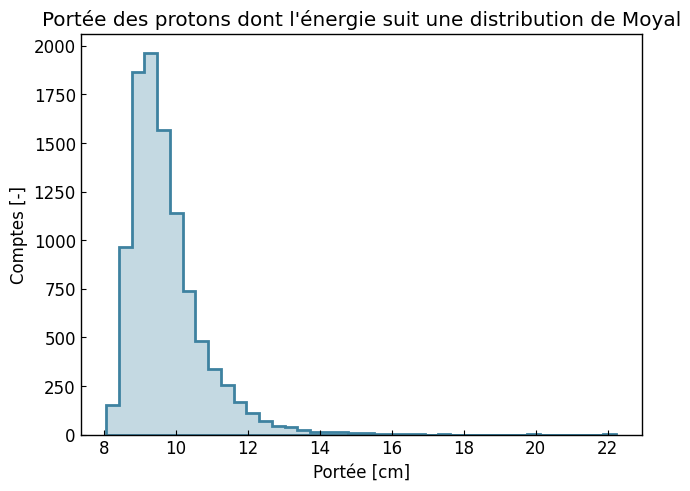

In [15]:
portees = [sp.integrate.quad(f_os, 3, proton)[0] for proton in distribution]

fig = gl.Figure('Portée [cm]', 'Comptes [-]', title="Portée des protons dont l'énergie suit une distribution de Moyal")
fig.add_elements(gl.Histogram(portees, number_of_bins=40, label='', normalize=False))
fig.show(legend=False)

On remarque que la distribution obtenue présente une forme similaire à la distribution initiale de l'énergie. Ainsi, pour un grand nombre d'échantillons, la distribution converge vers celle théorique. La distribution présente un mode aux alentours de 9-10 cm ce qui représente l'énergie moyenne du faisceau. La queue allongée à droite illustre les quelques protons ayant une grande énergie et donc une grande portée. Selon le théorème central limite, la somme de plusieurs interactions aléatoires devrait tendre vers une distribution gaussienne, mais étant donné que des protons à haute énergie sont présents, on observe un décalage de la distribution et une forme non strictement gaussienne.


## Énergie déposée

### Il est possible de calculer l’énergie déposée pour un pas de déplacement du proton $s$ dans un milieu comme suit :

$$
\begin{align*}
s = \int_{T_f}^{T_i}\frac{dT'}{S_{col}}
\end{align*}
$$

### où $T_i$ et $T_f$ sont les énergies cinétiques respectivement avant et après que le proton ait subi une perte d’énergie dans l’épaisseur $s$ du matériau.

### 13- Écrivez un algorithme capable de réaliser le transport des protons subissant une décélération continue dans le milieu et tracez le dépôt d’énergie en fonction de la profondeur pour l’eau et l’os pour des protons d’énergie cinétique 150 MeV (faisceau monoénergétique). Votre courbe comportera un point où l’énergie déposée est nulle. La position de ce point est-elle conforme à vos résultats antérieurs sur la portée ? Qu’est-ce qui influence sa valeur ?

<div style="color:red; font-size:18px;">
5.5/6

<div style="font-size:14px;">
    <li>Je ne vois pas dans votre code comment vous avez extrait les positions des pics. -0.5</li>

</div>
</div>


Le code suivant est utilisé pour calculer la distance parcourue par les protons selon leur énergie finale. Grâce à cette énergie finale, le pouvoir collisionnel est calculé pour chaque distance parcourue, et le dépôt d'énergie en fonction de la profondeur est représenté sous forme de graphique. Le dépôt d'énergie par unité de distance est choisi afin de représenter plus fidèlement le comportement des protons.

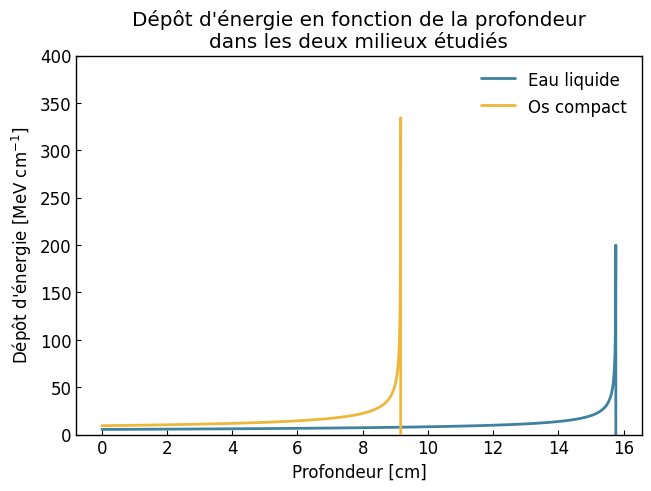

In [16]:
distances_eau = []
distances_os = []
T_i = 150
T_f = np.linspace(150, 0.001, 100)
for T_f_i in T_f:
    distances_eau.append(methode_de_romberg(f_eau, T_f_i, T_i, erreur_max=1e-4)[0])
    distances_os.append(methode_de_romberg(f_os, T_f_i, T_i, erreur_max=1e-4)[0])

fig = gl.Figure(
    y_label="Dépôt d'énergie [MeV cm$^{-1}$]",
    x_label="Profondeur [cm]",
    y_lim=(0,400),
    title="Dépôt d'énergie en fonction de la profondeur\ndans les deux milieux étudiés"
)

fig.add_elements(
    gl.Curve(distances_eau, 1/f_eau(T_f), label="Eau liquide"),
    gl.Curve(distances_os, 1/f_os(T_f), label="Os compact"),
)
fig.show()


On remarque effectivement que les courbes ont une décroissance abrupte après leur pic, et que l'abscisse à l'origine correspond à la portée dans chaque milieu, soit d'environ 15.76 cm et 9.16 cm pour l'eau liquide et l'os compact respectivement. Après le pic, l'énergie déposée est nulle et ce point dépend de la densité électronique et de la densité massique du milieu. De plus, l'énergie initiale des protons influence leur portée et donc la position du point de dépôt d'énergie nul.

### 14- On nomme cette courbe le pic de Bragg. En déduire l’intérêt des protons pour la radiothérapie.

<div style="color:red; font-size:18px;">
1/1

</div>

La courbe de Bragg représente la perte d'énergie de la radiation ionisante au cours de son parcours à travers la matière. Le pic élevé situé juste avant la portée calculée permet de concentrer le dépôt d'énergie dans une région précise, et donc de limiter les dommages aux tissus environnants. Les protons sont donc utilisés lorsque les traitements de radiothérapie par photons seraient trop dommageables pour les tissus sains, puisque les photons déposent une grande partie de leur énergie en surface. Il est ainsi possible de minimiser les effets secondaires en limitant le dépôt d'énergie dans des régions non désirées.

### 15- Selon vous, est-il nécessaire de calculer les portées jusqu’à la précision machine en protonthérapie ? Pourquoi ?

<div style="color:red; font-size:18px;">
1/1

<div style="font-size:14px;">
        <li>Attention, ici les données sont en cm autour de 10 cm et plus. Ça change un peu le calcul </li>
    
</div>
</div>

La précision machine est de l'ordre de $10^{-16}$ fois la portée calculée. Or, la protonthérapie cible des régions constituées d'amas de cellules, dont la taille individuelle est de l'ordre du micromètre. Une précision de l'ordre du micromètre devrait donc être suffisante. Or, pour une portée de l'ordre du mètre, la précision machine est de l'ordre de $10^{-10}$ micromètres, soit plusieurs ordres de grandeur plus précis que nécessaire. Une telle précision ne fait qu'alourdir les calculs pour obtenir une portée précise au noyau nucléaire près, ce qui est loin d'être requis par la procédure. De surcroît, d'autres erreurs bien plus considérables interviennent lorsqu'il est question de radiothérapie, notamment le mouvement du patient ou l'incertitude sur les propriétés des tissus.

### 16- En quoi les protons sont-ils préférables aux photons pour traiter un mélanome oculaire ?

<div style="color:red; font-size:18px;">
1/1

</div>

Comme mentionné précédemment, le contrôle accru sur la taille de la région irradiée permet de concentrer le traitement sur les cellules cancéreuses et de préserver le tissu oculaire sain aux alentours de la tumeur. Le mélanome oculaire est typiquement situé près de structures sensibles, telles que le nerf optique, la rétine ou le cristallin. Il est donc impératif de concentrer l'irradiation uniquement sur la tumeur pour limiter des dommages collatéraux, permettant au patient de conserver la vue, au moins en partie, ce qui est extrêmement avantageux.

### 17- Dans l’approche développée ici, les protons vont essentiellement en ligne droite dans la matière. Est-ce réaliste ? Que devra-t-on éventuellement ajouter à notre modèle ?

<div style="color:red; font-size:18px;">
1/1

</div>
</div>

Les protons sont des particules chargées de masse non nulle. Lors de leur parcours dans la matière, ils entrent en collision avec d'autres particules chargées (électrons, protons) ou non (neutrons). Dans tous les cas, ils subissent des déviations liées aux interactions électromagnétiques et nucléaires. Il n'est donc pas réaliste de considérer un parcours purement linéaire. Il faudrait ajouter au modèle une composante de diffusion dans le milieu qui permettrait, à défaut de calculer la trajectoire exacte de chaque proton, de calculer la distribution angulaire statistique du faisceau de protons.

De plus, il est faux de considérer uniquement des milieux homogènes et isotropes pour représenter les tissus. Il serait ainsi bénéfique d'intégrer des milieux hétérogènes présentant des changements de densité et de composition pour renforcer le réalisme du modèle.